# ANIME DATA EXPLORATION
---

## Modules import

In [1]:
# Importing needed modules and setting parameters
import pandas as pd
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import warnings
from IPython.display import HTML, display
from nltk.corpus import wordnet

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 20, 10
%matplotlib inline

with open('config.json') as json_data_file:
    config = json.load(json_data_file)

## Data import and curation

In [2]:
anime_rec_data = pd.read_pickle(
    os.path.join(config['Data_path'], 'anime_recommendation_database.pck'))

anime_user_rating_data = pd.read_csv(
    os.path.join(config['Data_path'], 'rating_complete.csv'))

anime_data = anime_rec_data[[
    'MAL_ID', 'Name', 'English name', 'Genres', 'Anime rating', 'synopsis', 'empath_themes', 'Type', 'Episodes',
    'Members', 'Popularity'
]]
anime_data.columns = [
    'anime_id', 'title', 'english_title', 'genres', 'anime_rating', 'synopsis', 'empath_themes', 'type',
    'episodes', 'members', 'popularity'
]
anime_final_data = pd.merge(anime_data,
                            anime_user_rating_data,
                            on='anime_id',
                            suffixes=['', '_user'])

In [3]:
anime_data

,anime_id,title,english_title,genres,anime_rating,synopsis,empath_themes,type,episodes,members,popularity
0,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,"Action, Drama, Mystery, Sci-Fi, Space",8.39,"other day, another bounty—such is the life of ...",business surprise attractive art appearance mo...,Movie,1,273145,518
2,6,Trigun,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",8.24,"the is the man with a $$60,000,000,000 bounty ...",suffering superhero business stealing crime mo...,TV,26,558913,201
3,7,Witch Hunter Robin,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",7.27,ches are individuals with special powers like ...,business crime prison art order government con...,TV,26,94683,1467
4,8,Bouken Ou Beet,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",6.98,It is the dark century and the people are suff...,suffering fun strength order traveling governm...,TV,52,13224,4369
...,...,...,...,...,...,...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",NaN,No synopsis information has been added to this...,computer communication internet reading meetin...,ONA,Unknown,354,13116
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",NaN,ko is a typical high school student whose life...,hygiene suffering business surprise crime orde...,TV,Unknown,7010,17562
16211,48488,Higurashi no Naku Koro ni Sotsu,Higurashi:When They Cry – SOTSU,"Mystery, Dementia, Horror, Psychological, Supe...",NaN,Sequel to no ni .,,TV,Unknown,11309,17558
16212,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",NaN,no anime.,,TV,Unknown,1386,17565


In [4]:
anime_final_data

,anime_id,title,english_title,genres,anime_rating,synopsis,empath_themes,type,episodes,members,popularity,user_id,rating
0,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,3,9
1,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,6,6
2,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,14,9
3,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,19,8
4,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,22,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56726856,48456,SK∞: Crazy Rock Jam,Unknown,"Comedy, Sports",6.52,cap of the first 9 episodes of .,,Special,1,10722,4830,342067,5
56726857,48456,SK∞: Crazy Rock Jam,Unknown,"Comedy, Sports",6.52,cap of the first 9 episodes of .,,Special,1,10722,4830,347462,4
56726858,48456,SK∞: Crazy Rock Jam,Unknown,"Comedy, Sports",6.52,cap of the first 9 episodes of .,,Special,1,10722,4830,348266,5
56726859,48456,SK∞: Crazy Rock Jam,Unknown,"Comedy, Sports",6.52,cap of the first 9 episodes of .,,Special,1,10722,4830,348321,6


In [5]:
anime_data.to_pickle(
    os.path.join(config['Data_path'], 'final_empath_recommendation_anime_data.pck'))

In [6]:
anime_final_data.to_pickle(
    os.path.join(config['Data_path'], 'final_recommendation_anime_data.pck'))

## Data Exploration

### Top fifteen anime based on  user rating

Text(0, 0.5, 'User rating count')

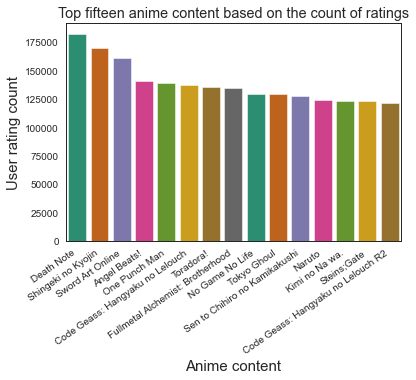

In [7]:
anime_ratings_combined = anime_final_data.dropna(axis=0, subset=['title'])
anime_ratings_count = (anime_ratings_combined.groupby(
    by=['title'])['rating'].count().reset_index().rename(
        columns={'user_rating': 'totalRatingCount'})[['title', 'rating']])

top_15_rated = anime_ratings_count[['title', 'rating'
                                     ]].sort_values(by='rating',
                                                    ascending=False).head(15)

ax = sns.barplot(x='title', y='rating', data=top_15_rated, palette='Dark2')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=35, ha='right')
ax.set_title('Top fifteen anime content based on the count of ratings')
ax.set_xlabel('Anime content', fontsize=15)
ax.set_ylabel('User rating count', fontsize=15)

In [8]:
anime_final_data = anime_final_data.merge(anime_ratings_count,
                                          left_on='title',
                                          right_on='title',
                                          how='left')

anime_final_data = anime_final_data.rename(columns={
    'ratings_x': 'rating',
    'rating_y': 'total_rating_count'
})

### Top fifteen anime content based on the size of the community

In [9]:
anime_copied = anime_final_data.copy()
anime_copied.drop_duplicates(subset='title', keep='first', inplace=True)

Text(0, 0.5, 'Size of community')

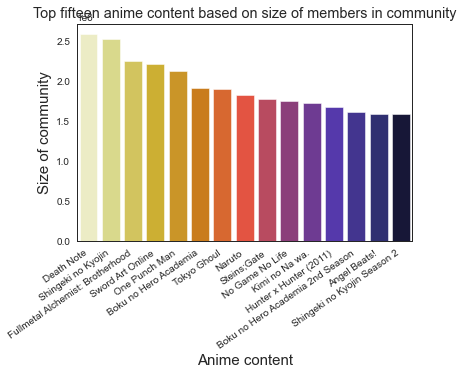

In [10]:
top_15_comm_members = anime_copied[['title', 'members'
                                    ]].sort_values(by='members',
                                                   ascending=False).head(15)

ax = sns.barplot(x='title',
                 y='members',
                 data=top_15_comm_members,
                 palette='CMRmap_r')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=35, ha='right')
ax.set_title('Top fifteen anime content based on size of members in community')
ax.set_xlabel('Anime content', fontsize=15)
ax.set_ylabel('Size of community', fontsize=15)

Text(0, 0.5, 'Popularity')

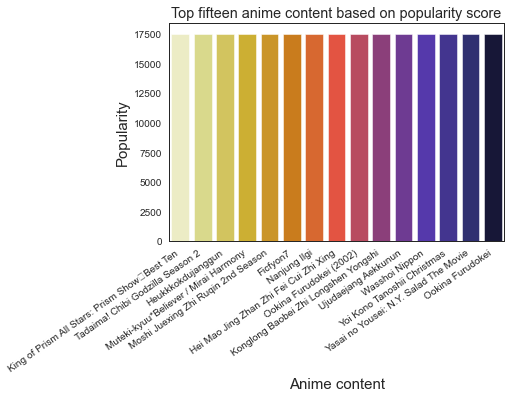

In [11]:
top_15_popular = anime_copied[['title', 'popularity'
                                    ]].sort_values(by='popularity',
                                                   ascending=False).head(15)

ax = sns.barplot(x='title',
                 y='popularity',
                 data=top_15_popular,
                 palette='CMRmap_r')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=35, ha='right')
ax.set_title('Top fifteen anime content based on popularity score')
ax.set_xlabel('Anime content', fontsize=15)
ax.set_ylabel('Popularity', fontsize=15)

Text(0, 0.5, 'Anime Rating')

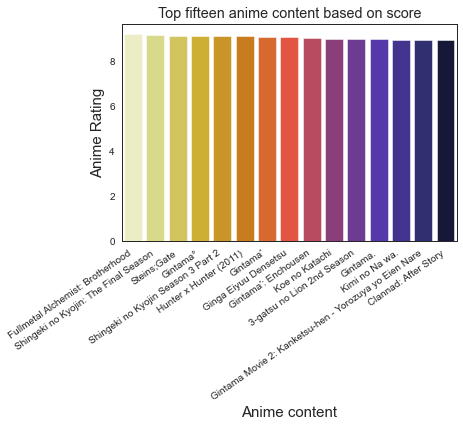

In [12]:
top_15_score = anime_copied[['title', 'anime_rating'
                                    ]].sort_values(by='anime_rating',
                                                   ascending=False).head(15)

ax = sns.barplot(x='title',
                 y='anime_rating',
                 data=top_15_score,
                 palette='CMRmap_r')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=35, ha='right')
ax.set_title('Top fifteen anime content based on score')
ax.set_xlabel('Anime content', fontsize=15)
ax.set_ylabel('Anime Rating', fontsize=15)

In [13]:
anime_final_data

,anime_id,title,english_title,genres,anime_rating,synopsis,empath_themes,type,episodes,members,popularity,user_id,rating_x,total_rating_count
0,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,3,9,79714
1,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,6,6,79714
2,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,14,9,79714
3,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,19,8,79714
4,1,Cowboy Bebop,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78,"In the year 2071, humanity has colonized sever...",superhero music fun musical stealing crime art...,TV,26,1251960,39,22,9,79714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56726856,48456,SK∞: Crazy Rock Jam,Unknown,"Comedy, Sports",6.52,cap of the first 9 episodes of .,,Special,1,10722,4830,342067,5,180
56726857,48456,SK∞: Crazy Rock Jam,Unknown,"Comedy, Sports",6.52,cap of the first 9 episodes of .,,Special,1,10722,4830,347462,4,180
56726858,48456,SK∞: Crazy Rock Jam,Unknown,"Comedy, Sports",6.52,cap of the first 9 episodes of .,,Special,1,10722,4830,348266,5,180
56726859,48456,SK∞: Crazy Rock Jam,Unknown,"Comedy, Sports",6.52,cap of the first 9 episodes of .,,Special,1,10722,4830,348321,6,180


In [20]:
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
anime_final_data['anime_rating'].hist(bins=100)
plt.subplot(1, 2, 2)
anime_final_data['rating_x'].hist(bins=100)
plt.subplot(1, 2, 2)

In [16]:
import plotly.graph_objects as go
labels = anime_final_data['type'].value_counts().index
values = anime_final_data['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [17]:
nonull_anime_data = anime_final_data.copy()
nonull_anime_data.dropna(inplace=True)

(-0.5, 1199.5, 799.5, -0.5)

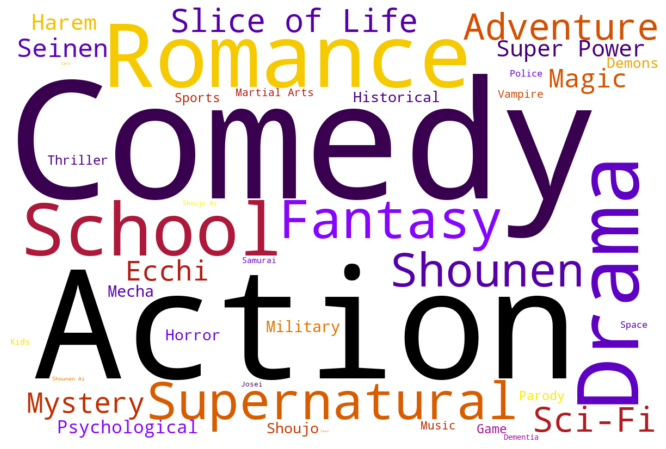

In [18]:
from collections import defaultdict
plt.figure(figsize=(15, 8))
all_genres = defaultdict(int)

for genres in nonull_anime_data['genres']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(
    width=1200, height=800, background_color='white',
    colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 1199.5, 799.5, -0.5)

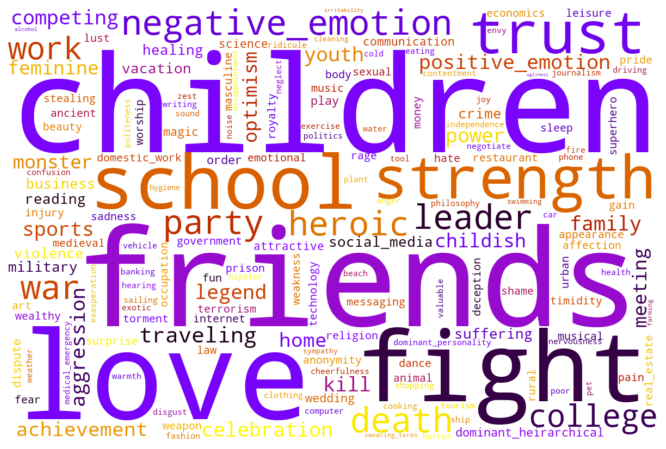

In [19]:
all_empaths = defaultdict(int)

for empaths in nonull_anime_data['empath_themes']:
    for empath in empaths.split(' '):
        all_empaths[empath.strip()] += 1
plt.figure(figsize=(15, 8))
empath_cloud = WordCloud(
    width=1200, height=800, background_color='white',
    colormap='gnuplot').generate_from_frequencies(all_empaths)
plt.imshow(empath_cloud, interpolation='bilinear')
plt.axis('off')